# Assignment1

## Notebook made by  

|** Name** | **Student id** | **email**|
|:- |:-|:-|
|Jimi Cornelisse | 10591699 | jimicornelisse@hotmail.com |
|Jochem van Dooren  | 10572929 |jochemvandooren@hotmail.nl |
|Martijn Muller  | 10641599 |mart45mart@hotmail.com |

### Pledge (taken from [Coursera's Honor Code](https://www.coursera.org/about/terms/honorcode) )



Put here a selfie with your photo where you hold a signed paper with the following text: (if this is team work, put two selfies here). The link must be to some place on the web, not to a local file. 

> My answers to homework, quizzes and exams will be my own work (except for assignments that explicitly permit collaboration).

>I will not make solutions to homework, quizzes or exams available to anyone else. This includes both solutions written by me, as well as any official solutions provided by the course staff.

>I will not engage in any other activities that will dishonestly improve my results or dishonestly improve/hurt the results of others.

<img src='link to your selfie'/>

### Note
* **Assignments without the selfies or completely filled in information will not be graded and receive 0 points.**


# Q1 (Monty Hall problem)

This is the part you hand in from the [warm up notebook](MontyHall.ipynb).

##  This counts for your mark

Generalize your simulation code to handle the case of `n` doors.


This sentence can be read in two ways, giving very different outcomes! You must program both, and understand that it all makes sense.


### Your work
For both interpretations, give a plot with the number of doors on the x-axis and the win_percentage on the y-axis, and plot that value for the two strategies for numbers of doors between 3 and 20. 

Describe briefly what is going on here, and why the plots makes sense.


### Interpretation  1
* There are _n_ doors.
* You have chosen one door.
* The host opens one door as before (it is not the door you have chosen and not a door with the prize)
* Now you switch or not.

In [2]:
#IPython is what you are using now to run the notebook
import IPython
print "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__

from __future__ import division

# Numpy is a library for working with Arrays
import numpy as np
print "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__

# SciPy implements many different numerical algorithms
import scipy as sp
print "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__

# Pandas makes working with data tables easier
import pandas as pd
print "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__

# Module for plotting
import matplotlib
print "Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print "Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__

# Requests is a library for getting data from the Web
import requests
print "requests version:     %6.6s (need at least 1.2.3)" % requests.__version__

# Networkx is a library for working with networks
import networkx as nx
print "NetworkX version:     %6.6s (need at least 1.7)" % nx.__version__

#BeautifulSoup is a library to parse HTML and XML documents
import bs4
print "BeautifulSoup version:%6.6s (need at least 4.0)" % bs4.__version__

#MrJob is a library to run map reduce jobs on Amazon's computers
import mrjob
print "Mr Job version:       %6.6s (need at least 0.4)" % mrjob.__version__

#Pattern has lots of tools for working with data from the internet
import pattern
print "Pattern version:      %6.6s (need at least 2.6)" % pattern.__version__

#Seaborn is a nice library for visualizations
import seaborn
print "Seaborn version:      %6.6s (need at least 0.3.1)" % seaborn.__version__

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt  
%matplotlib inline  


IPython version:       4.0.3 (need at least 1.0)
Numpy version:        1.10.1 (need at least 1.7.1)
SciPy version:        0.16.0 (need at least 0.12.0)
Pandas version:       0.17.1 (need at least 0.11.0)
Mapltolib version:     1.5.0 (need at least 1.2.1)
Scikit-Learn version:   0.17 (need at least 0.13.1)
requests version:      2.9.1 (need at least 1.2.3)
NetworkX version:       1.10 (need at least 1.7)
BeautifulSoup version: 4.4.1 (need at least 4.0)
Mr Job version:        0.4.6 (need at least 0.4)
Pattern version:         2.6 (need at least 2.6)
Seaborn version:       0.7.0 (need at least 0.3.1)


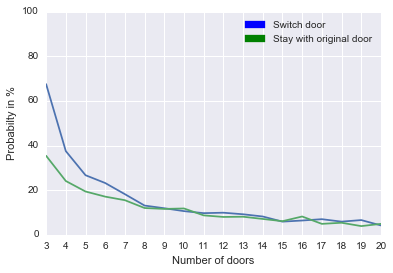

In [3]:
#create list of prizedoors based on number of doors(n) and simulations(nsim)
def simulate_prizedoor(n, nsim):
    answer = np.random.randint(n, size=nsim)
    return answer

#create list of guesses based on number of doors(n) and simulations(nsim)
def simulate_guess(n, nsim):
    guesses = np.random.randint(n, size=nsim)
    return guesses

#create list of goat doors based on guesses and prizedoors
def goat_door(prizedoors, guesses, n):
    goats = []
    
    #iterate for number of simulations
    for i in range(0, len(prizedoors)):
        options = generate_options(n)
       
        x = prizedoors[i]
        y = guesses[i]
        
        #remove guess and prizedoor from options per simulation
        if x in options:
            options.remove(x)
        if y in options:
            options.remove(y)
            
        #choose random goatdoor which is not a guess or prizedoor   
        goat = np.random.choice(options)
        goats.append(goat)
        
    return goats

#create list of guesses based on the fact that the player always switches the door
def switch_guess(guesses, goatdoors, n):
    newguesses = []
    
    #iterate for number of simulations
    for i in range(0, len(guesses)):
        options = generate_options(n)
        
        x = guesses[i]
        y = goatdoors[i]
        
        #remove guess and goatdoor from options per simulation
        if x in options:
            options.remove(x)
        if y in options:
            options.remove(y)
        
        #random selecting of switching a guess, not able to select previous guess or goatdoor
        switchguess = np.random.choice(options)
        newguesses.append(switchguess)
    
    return newguesses

#calculate how many times the player guessed the prizedoor right
def win_percentage(guesses, prizedoors):
    win = 0.0
    for i in range (0, len(prizedoors)):
        x = guesses[i]
        y = prizedoors[i]
        
        if x == y:
            win = win+1
            
    return (win/len(guesses))*100

#generate list of doors
def generate_options(n):
    options=[]
    for i in range(0,n):
        options.append(i)
    return options

#generate win percentage when player never changes door
def original_guess(n, nsim):
    options = generate_options(n)
    goats = []
    prizedoors = []
    guesses = []

    
    prizedoors = simulate_prizedoor(n, nsim)
    guesses = simulate_guess(n, nsim)
    goats = goat_door(prizedoors, guesses, n)

    
    return win_percentage(guesses, prizedoors)

#generate win percentage when player always changes door
def new_guess(n, nsim):
    options = generate_options(n)

    goats = []
    prizedoors = []
    guesses = []
    newguesses = []
    
    prizedoors = simulate_prizedoor(n, nsim)
    guesses = simulate_guess(n, nsim)
    goats = goat_door(prizedoors, guesses, n)
    
    newguesses = switch_guess(guesses, goats, n)
    
    return win_percentage(newguesses, prizedoors)


original_prob = []
new_prob = []
n_doors = []
#create lists with win percentages for both strategies for n(3-21) number of doors
for i in range (3, 21):
    original_prob.append(original_guess(i, 1000))
    new_prob.append(new_guess(i, 1000))
    n_doors.append(i)
    
#plot the win percentages
xnewprob = plt.plot(np.array(n_doors), np.array(new_prob))
xoriginalprob = plt.plot(np.array(n_doors), np.array(original_prob))
plt.axis([3, 20, 0, 100])
plt.ylabel('Probabilty in %')
plt.xlabel('Number of doors')
plt.xticks(n_doors)

#create legend
blue_patch = mpatches.Patch(color='blue', label='Switch door')
green_patch = mpatches.Patch(color='green', label='Stay with original door')
plt.legend(handles=[blue_patch, green_patch], loc = 1)
plt.show()


### Interpretation 2
* There are _n_ doors.
* You have chosen one door.
* The host opens _all except two doors_, namely your door, and a random other door.  Behind none of the opened doors lies the prize.

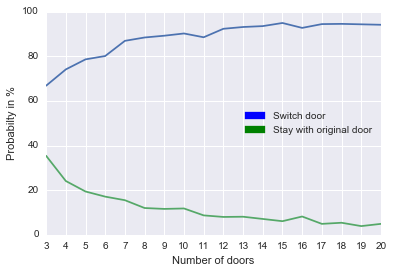

In [4]:
def goat_door2(prizedoors, guesses, n):
    goats = []
    allbutguessandprize = []
    #iterate for number of simulations
    for i in range(0, len(prizedoors)):
        options = generate_options(n)
        x = prizedoors[i]
        y = guesses[i]
        
        #if guess is different from prizedoor, remove both from options
        if x != y:
            options.remove(x)
            options.remove(y)
            
            #allbutguessandprize is filled with remaining goatdoors
            allbutguessandprize.append(options)

        else:
            if x in options:
                options.remove(x)
            if y in options:
                options.remove(y)
            
            goat = np.random.choice(options)
            options.remove(goat)
            allbutguessandprize.append(options)
    return allbutguessandprize

def switch_guess2(guesses, allbutguessandprize, n):
    newguesses = []
    
    for i in range(0, len(guesses)):
        options = generate_options(n)
        x = guesses[i]
        y = allbutguessandprize[i]
        
        if x in options:
            options.remove(x)
        for z in y:
            if z in options:
                options.remove(z)
        
        switchguess = np.random.choice(options)
        newguesses.append(switchguess)
    
    return newguesses

def new_guess2(n, nsim):
    options = generate_options(n)

    allbutguessandprize = []
    prizedoors = []
    guesses = []
    newguesses = []
    
    prizedoors = simulate_prizedoor(n, nsim)
    guesses = simulate_guess(n, nsim)
    allbutguessandprize = goat_door2(prizedoors, guesses, n)
    
    newguesses = switch_guess2(guesses, allbutguessandprize, n)
    
    return win_percentage(newguesses, prizedoors)
      

original_prob2 = []
new_prob2 = []
n_doors2 = []

#create lists with win percentages for both strategies for n(3-21) number of doors
for i in range (3, 21):
    original_prob2.append(original_guess(i, 1000))
    new_prob2.append(new_guess2(i, 1000))
    n_doors2.append(i)

    
#plot the win percentages
xnewprob2 = plt.plot(np.array(n_doors2), np.array(new_prob2))
xoriginalprob = plt.plot(np.array(n_doors2), np.array(original_prob))
plt.axis([3, 20, 0, 100])
plt.ylabel('Probabilty in %')
plt.xlabel('Number of doors')
plt.xticks(n_doors2)

#create legend
blue_patch = mpatches.Patch(color='blue', label='Switch door')
green_patch = mpatches.Patch(color='green', label='Stay with original door')
plt.legend(handles=[blue_patch, green_patch], loc = 0)
plt.show()

# Uitleg 

### Interpretation 1
Wanneer je niet wisselt van deur zal de kans altijd 1/n zijn dat je de prijs wint. Wanneer je altijd wisselt van deur zal de kans hoger zijn dan wanneer je niet wisselt van deur omdat er minder mogelijkheden zijn dan in de eerste instantie.

vb:

Bj 10 deuren is de kans 1/n = 1/10 = 0.10 wanneer er geen andere deur gekozen wordt. Als er wel een andere deur gekozen wordt, is de kans net wat hoger omdat er één deur minder is waar geen prijs achter zit. Hoe meer deuren er zijn, hoe minder het uitmaakt wanneer je van deur wisselt. 


### Interpretation 2
Wanneer je niet wisselt van deur zal de kans hetzelfde zijn als bij interpretation 1. De kans op winst is dus 1/n.

Als je wel wisselt van deur is de kans een stuk groter, want er blijven altijd maar twee deuren dicht. 

vb. bij 20 deuren is de kans dat er in eerste instantie de prijs gekozen wordt 1/20 en de kans dat de prijs achter de overgebleven deur zit is dan 19/20. Dit komt omdat de prijsdeur altijd gesloten blijft ongeacht wat de guess van de speler is.

# Q2 Notebook assignment

See [Getting familiar with the notebook](../../LectureNotes/lecture_notes_week1.html#ass)

Put your lecture as a slideshow here. 